<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [21]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# YOUR CODE
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1441,35,86.45,3029.1,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,1
5246,31,19.55,658.95,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
13,26,38.85,1025.15,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),0
4113,18,95.05,1679.4,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
3661,27,81.70,2212.55,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   int64  
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   int64  
 6   HasChild                  5268 non-null   int64  
 7   HasPhoneService           5268 non-null   int64  
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

In [34]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
data[data.TotalSpent.isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


In [32]:
data_test.TotalSpent = pd.to_numeric(data_test.TotalSpent, errors='coerce')
data_test[data_test.TotalSpent.isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod


In [33]:
data.loc[data['ClientPeriod'] == 0, 'TotalSpent'] = 0
data_test.loc[data_test['ClientPeriod'] == 0, 'TotalSpent'] = 0

In [26]:
# binary features
bin_feats = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']
bin_dict = {'Male': 0, 'Female' : 1, 'No': 0, 'Yes': 1}
for df in (data, data_test):
    df.loc[:, bin_feats] = df.loc[:, bin_feats].replace(bin_dict)
bin_feats.append('IsSeniorCitizen')
data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,0,1,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,0
1,72,25.85,1872.2,0,0,1,0,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),0
2,1,75.90,75.9,0,0,0,0,1,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,1,Electronic check,1
3,32,79.30,2570,1,1,1,0,1,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,0,Mailed check,0
4,60,115.25,6758.45,1,0,1,1,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),0


In [29]:
# duplicates 
data.duplicated().sum()

14

In [30]:
data.drop_duplicates(inplace = True)
data.reset_index(inplace = True, drop = True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

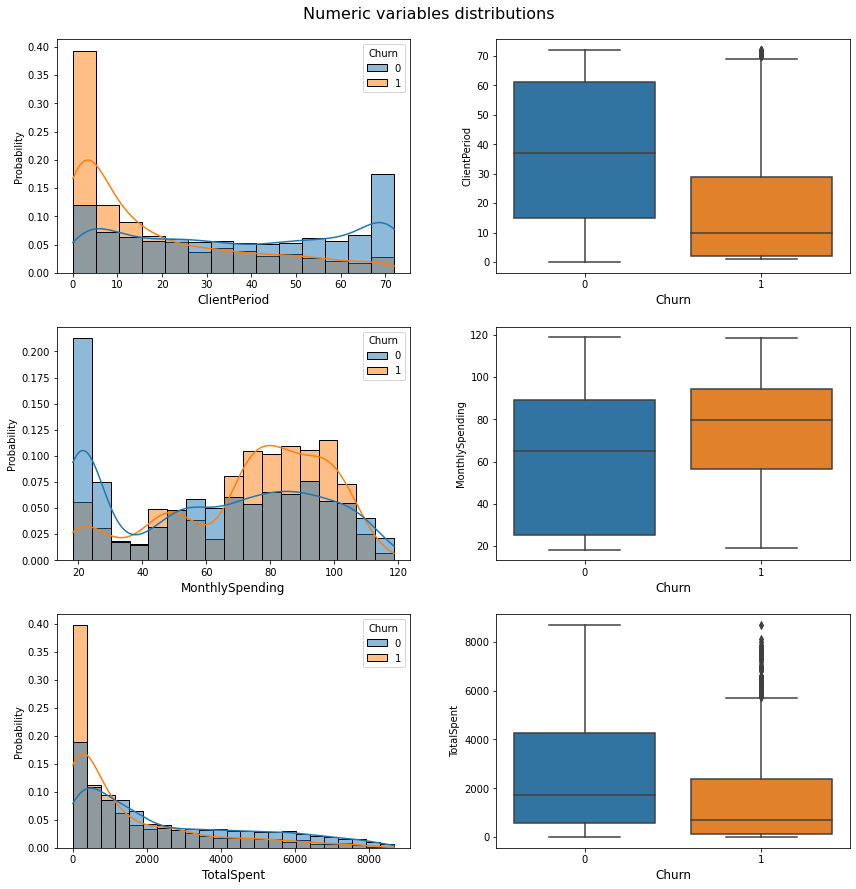

In [40]:
# YOUR CODE
# fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(12, 4 * len(num_cols)))
# plt.hist(data.ClientPeriod)
# plt.hist(data.MonthlySpending)

fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(12, 4 * len(num_cols)))
n_bins = 1 + int(np.floor(np.log2(len(data)))) # A variant of Sturges' rule 

for i, feat in enumerate(num_cols):
    ax1 = axes[i][0]
    ax2 = axes[i][1]
    sns.histplot(data=data, x=feat, hue='Churn', stat='probability', kde=True, common_norm=False, ax=ax1)
    sns.boxplot(x='Churn', y=feat, data=data, ax=ax2)
    ax1.set_xlabel(feat, fontsize=12)
    ax2.set_xlabel('Churn', fontsize=12)
fig.suptitle('Numeric variables distributions', y=1.025, fontsize=16)    
fig.tight_layout(h_pad=2, w_pad=4)

In [46]:
for feat in cat_cols:
  print(data[feat].value_counts())
  print()

0    2647
1    2621
Name: Sex, dtype: int64

0    4427
1     841
Name: IsSeniorCitizen, dtype: int64

0    2691
1    2577
Name: HasPartner, dtype: int64

0    3662
1    1606
Name: HasChild, dtype: int64

1    4747
0     521
Name: HasPhoneService, dtype: int64

No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetService, dtype: int64

No                     2604
Yes                    1529
No internet service    1135
Name: HasOnlineSecurityService, dtype: int64

No                     2324
Yes                    1809
No internet service    1135
Name: HasOnlineBackup, dtype: int64

No                     2309
Yes                    1824
No internet service    1135
Name: HasDeviceProtection, dtype: int64

No                     2596
Yes                    1537
No internet service    1135
Name: HasTechSupportAccess, dtype: int64

No               

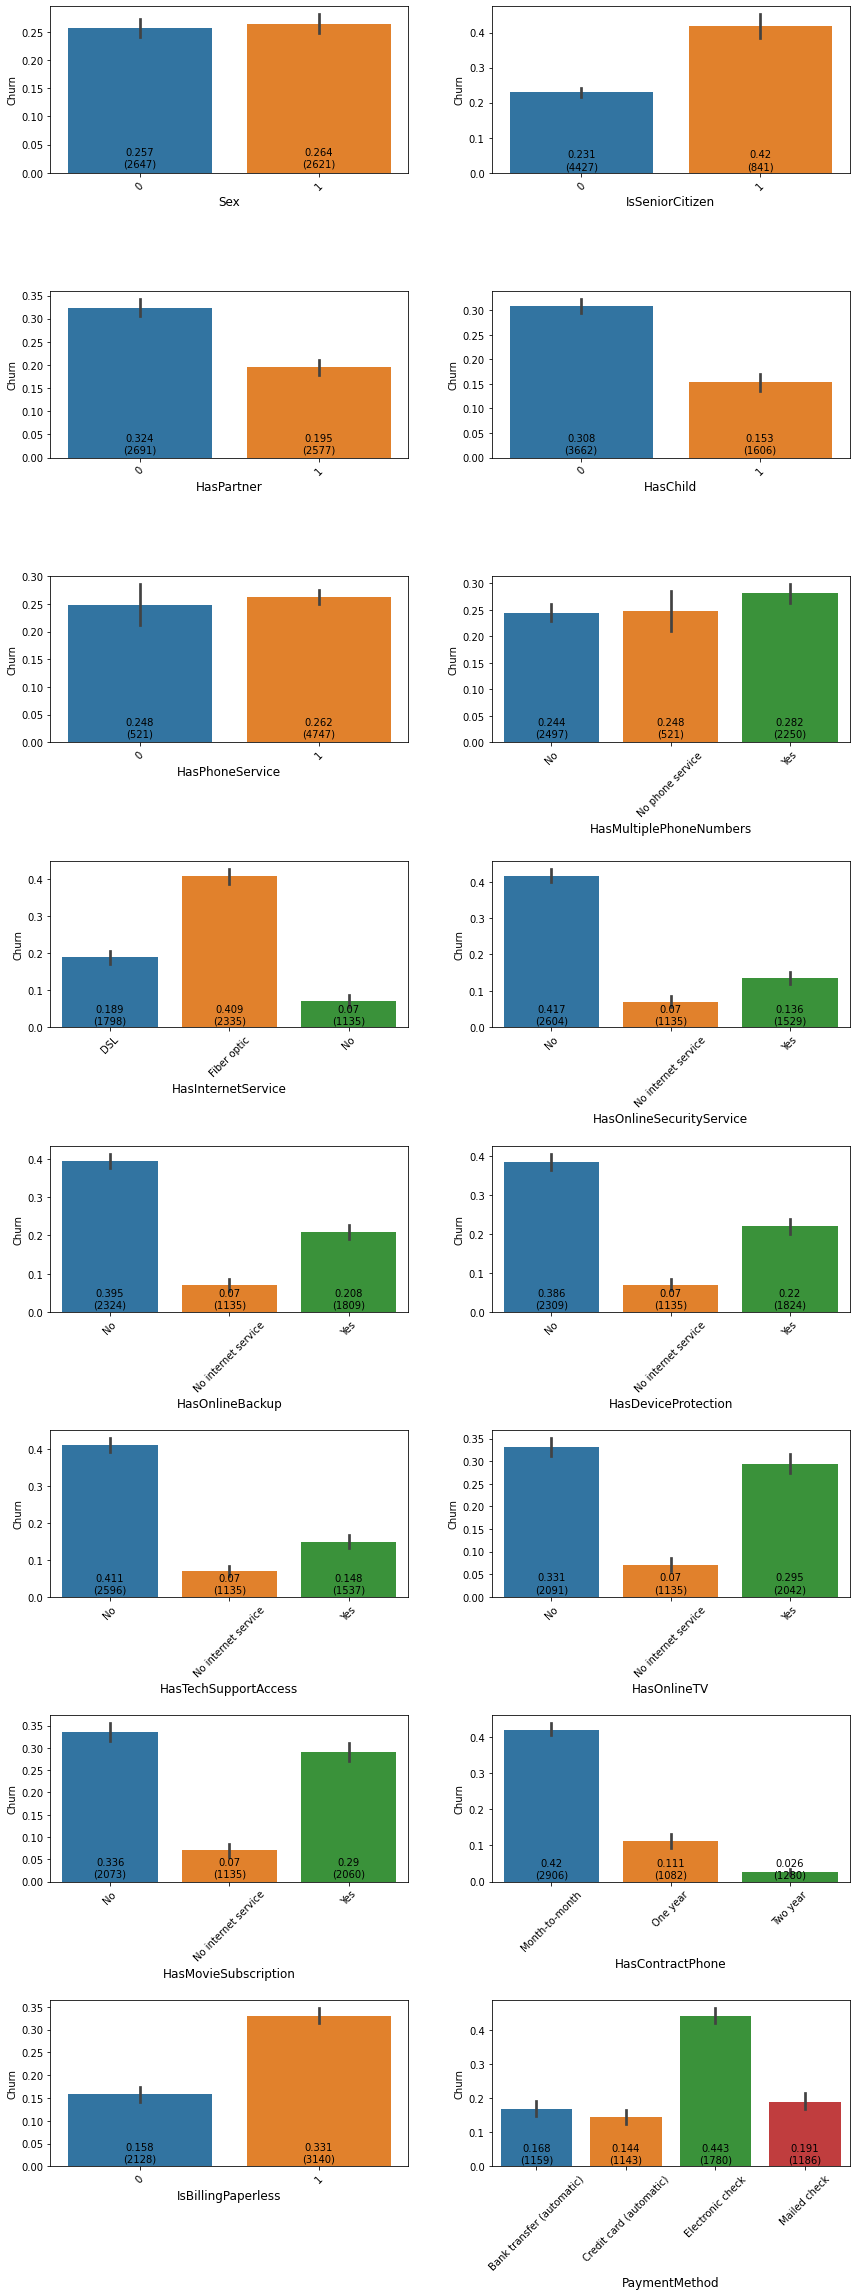

In [42]:
fig, axes = plt.subplots(nrows=int(len(cat_cols) / 2), ncols=2, figsize=(12, 2 * len(cat_cols)))

for i, feat in enumerate(cat_cols):
    ax = axes.ravel()[i]
    sns.barplot(x=data[feat], y=data['Churn'], ax=ax, order=sorted(data[feat].unique()))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel(feat, fontsize=12)
    for j, cat in enumerate(sorted(data[feat].unique())):
        churn = [round(data[data[feat] == cat]['Churn'].mean(), 3), data[data[feat] == cat]['Churn'].count()]
        ax.text(x=j, y=0.01, s=f'{churn[0]}\n({churn[1]})', horizontalalignment='center')
fig.tight_layout(h_pad=2, w_pad=4)

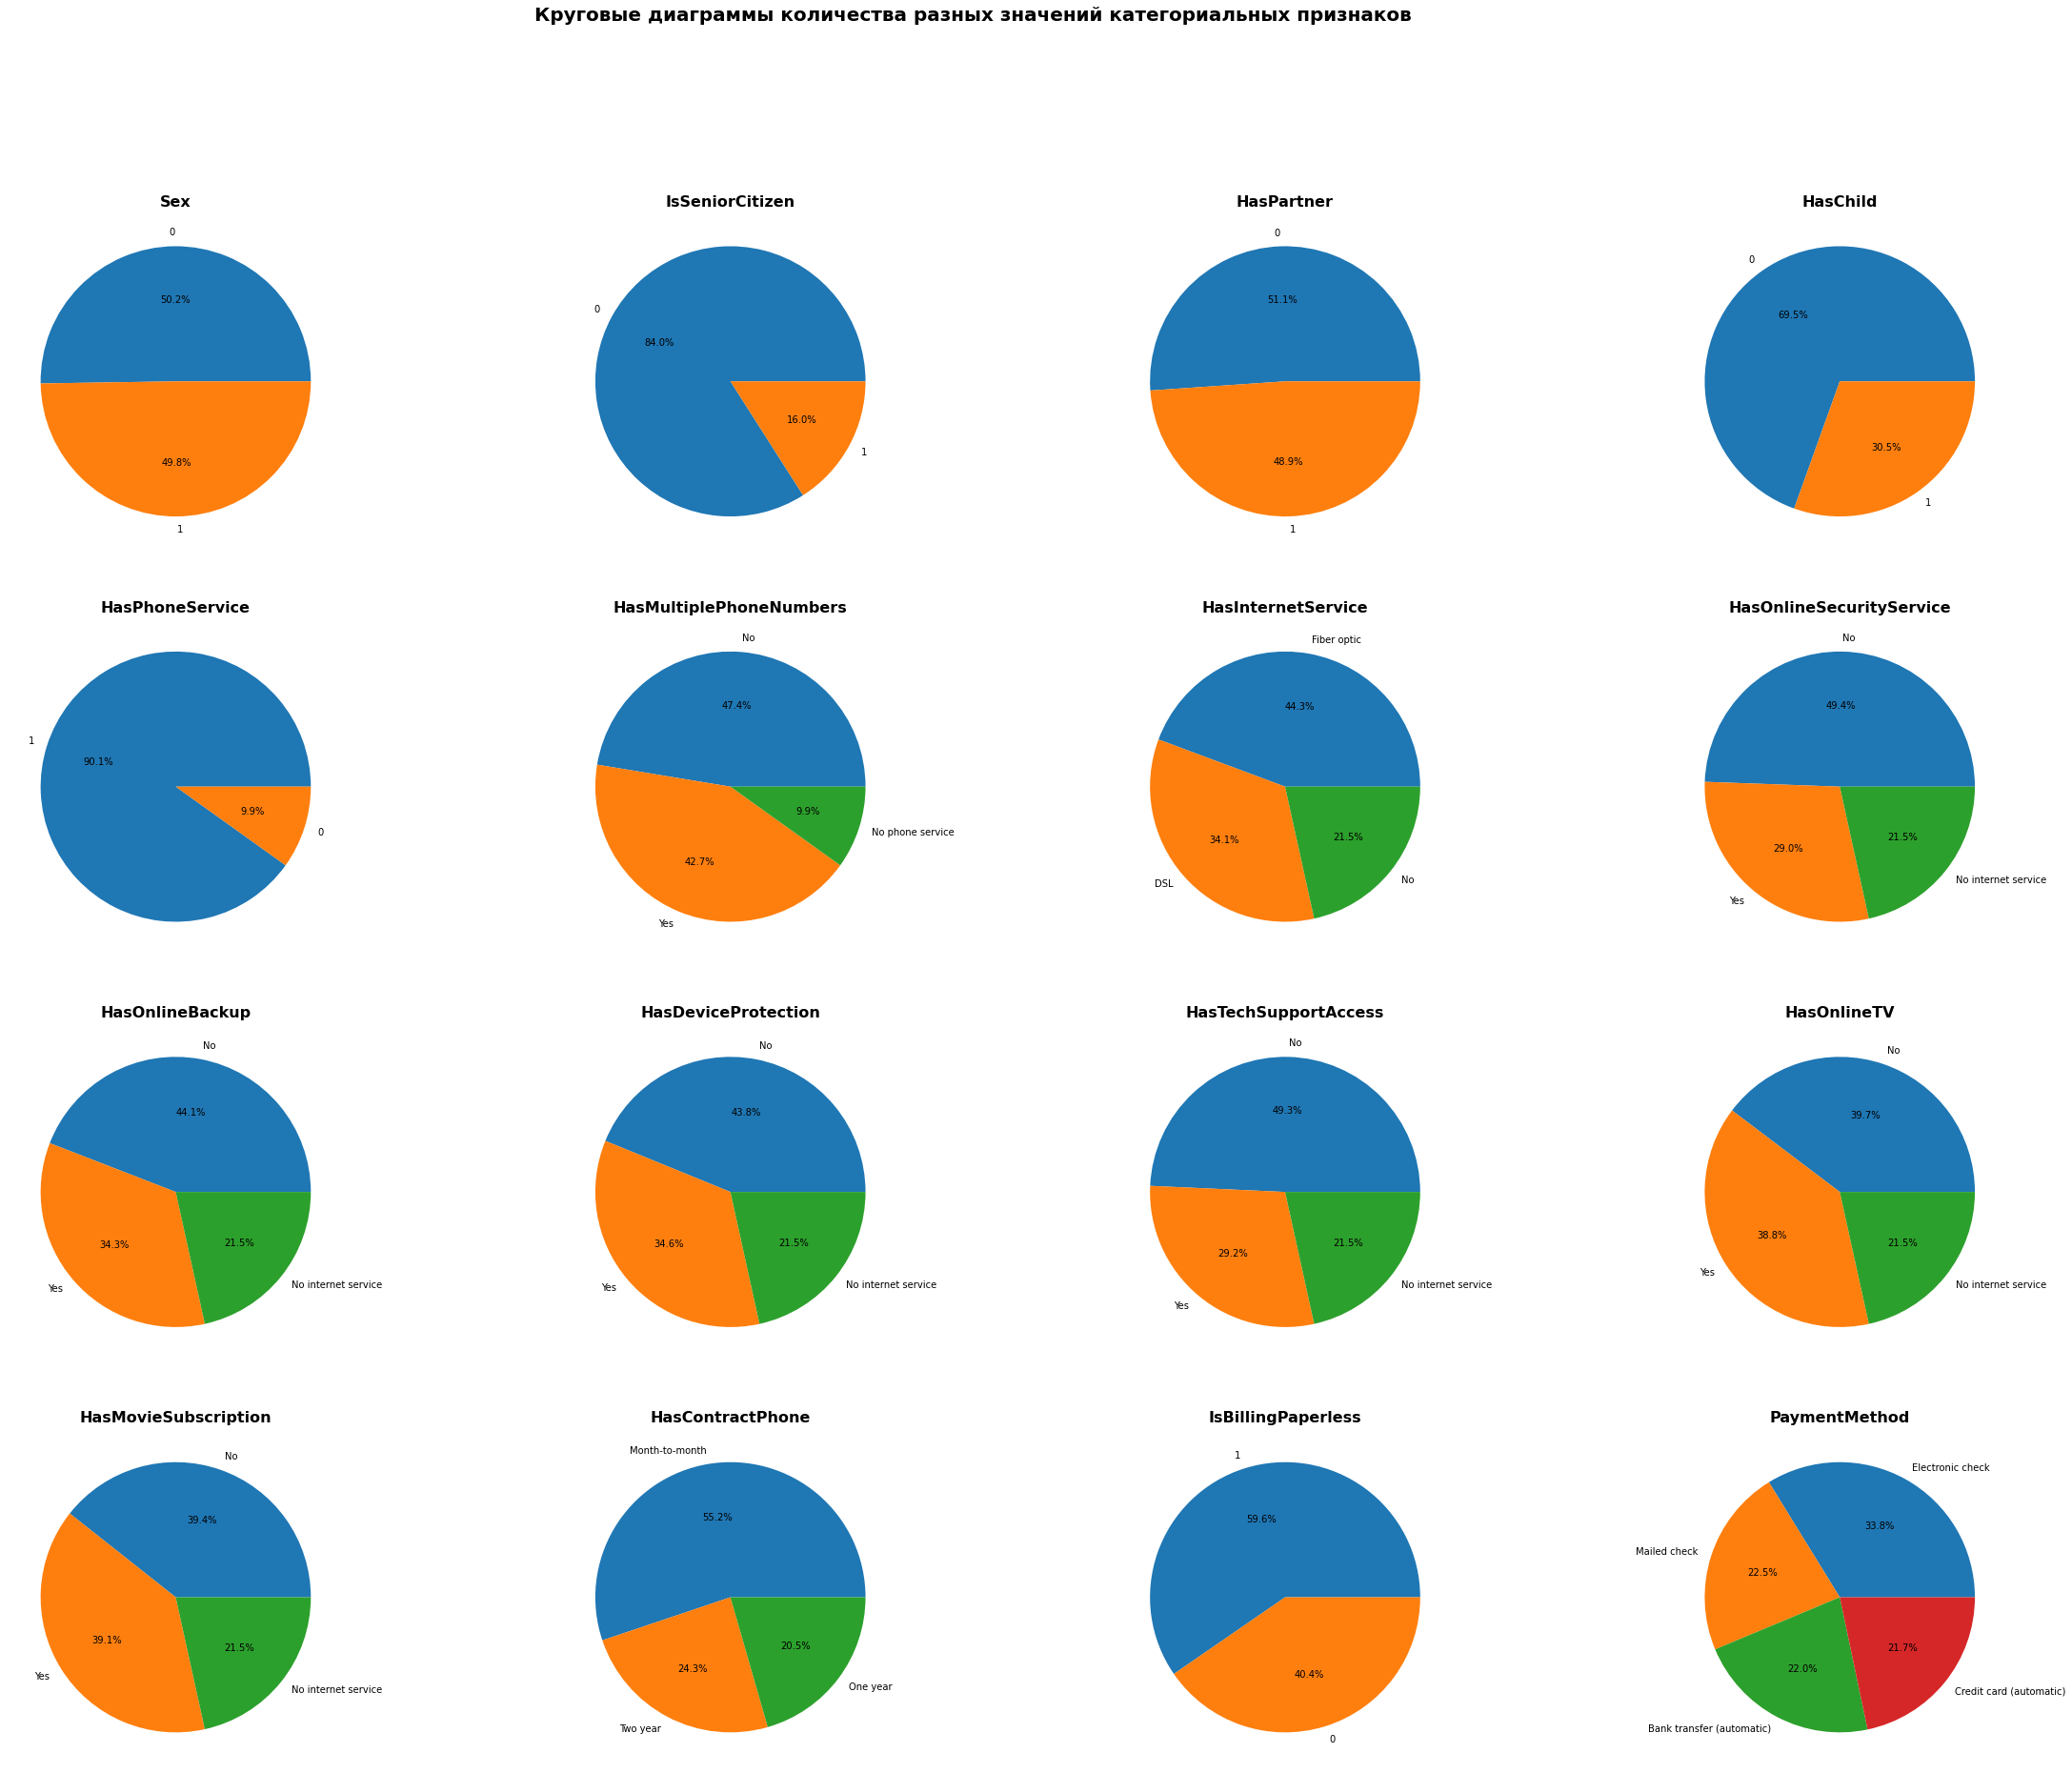

In [54]:
fig = plt.figure(figsize=(40 , 30))
fig.suptitle("Круговые диаграммы количества разных значений категориальных признаков", fontweight="bold", fontsize=20)

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(4, 4, i)
    ax.set_title(col, fontsize=16, fontweight="bold")
    
    data[col].value_counts().plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_ylabel(None)

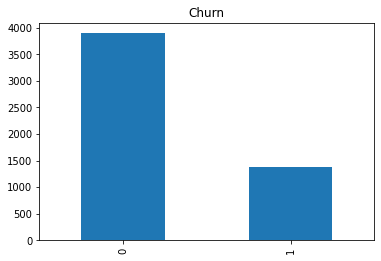

In [55]:
tvc = data[target_col].value_counts()
tvc.plot.bar(title=target_col);

In [56]:
tol = 0.2
target_class_percentage = tvc.loc[1] / sum(tvc)
print("Вывод: классы", "" if abs(target_class_percentage - 0.5) < tol else "не", "сбалансированы")

Вывод: классы не сбалансированы


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [74]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

In [58]:
# YOUR CODE
class DataTransformer:
    def __init__(self, num_cols, cat_cols, drop=None):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self._scaler = StandardScaler()
        self._one_hot_encoder = OneHotEncoder(sparse=False, drop=drop)

    def clear_data(self, data):
        data.loc[data['IsSeniorCitizen'] == 1, 'IsSeniorCitizen'] = 'Yes'
        data.loc[data['IsSeniorCitizen'] == 0, 'IsSeniorCitizen'] = 'No'
        data = data.convert_dtypes()
        data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
        data = data.fillna(data.mean())
        return data

    def fit(self, data, target=None):
        data = self.clear_data(data)
        self._scaler.fit(data[self.num_cols]) 
        self._one_hot_encoder.fit(data[self.cat_cols])

    def transform(self, data, target=None):
        data = self.clear_data(data)
        scaled_num_cols = self._scaler.transform(data[self.num_cols])
        encoded_cat_cols = self._one_hot_encoder.transform(data[self.cat_cols])
        return np.hstack((scaled_num_cols, encoded_cat_cols))

    def fit_transform(self, data, target=None):
        data = self.clear_data(data)
        scaled_num_cols = self._scaler.fit_transform(data[self.num_cols])
        encoded_cat_cols = self._one_hot_encoder.fit_transform(data[self.cat_cols])
        return np.hstack((scaled_num_cols, encoded_cat_cols))

from sklearn.pipeline import Pipeline
clsf = Pipeline(steps=[('datatransformer', DataTransformer(num_cols, cat_cols, drop='first')), ('logistic', LogisticRegression(random_state=42))])

In [62]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

grid_search = GridSearchCV(clsf, param_grid={'logistic__C': [100, 10, 1, 0.1, 0.01, 0.001]},
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=make_scorer(roc_auc_score), n_jobs=-1,
                               verbose=0)
X, y = data[feature_cols], data[target_col].astype('int8')
grid_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('datatransformer',
                                        <__main__.DataTransformer object at 0x7f0a3df5b690>),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring=make_scorer(roc_auc_score))

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [60]:
print("Лучшее качество: {} с параметрами {}".format(grid_search.best_score_, grid_search.best_params_))

Лучшее качество: 0.7195620545824569 с параметрами {'logistic__C': 10}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [64]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [65]:
# YOUR CODE
import catboost

categorical_indices = list(X.columns.get_loc(col) for col in cat_cols)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)
boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=categorical_indices)
boosting_model.fit(X_train, y_train)
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
print("\nКачество при стандартных параметрах:", roc_auc_score(y_test, y_test_predicted))

Learning rate set to 0.083298
0:	learn: 0.6406425	total: 68.8ms	remaining: 13.7s
1:	learn: 0.6047088	total: 81.3ms	remaining: 8.05s
2:	learn: 0.5711027	total: 98.5ms	remaining: 6.46s
3:	learn: 0.5491257	total: 110ms	remaining: 5.37s
4:	learn: 0.5241396	total: 128ms	remaining: 5s
5:	learn: 0.5055316	total: 140ms	remaining: 4.51s
6:	learn: 0.4937640	total: 146ms	remaining: 4.01s
7:	learn: 0.4823740	total: 162ms	remaining: 3.9s
8:	learn: 0.4692128	total: 180ms	remaining: 3.82s
9:	learn: 0.4602178	total: 198ms	remaining: 3.77s
10:	learn: 0.4530444	total: 217ms	remaining: 3.74s
11:	learn: 0.4465475	total: 235ms	remaining: 3.68s
12:	learn: 0.4402223	total: 255ms	remaining: 3.67s
13:	learn: 0.4352202	total: 271ms	remaining: 3.6s
14:	learn: 0.4309179	total: 284ms	remaining: 3.5s
15:	learn: 0.4264998	total: 299ms	remaining: 3.44s
16:	learn: 0.4226482	total: 315ms	remaining: 3.39s
17:	learn: 0.4192336	total: 339ms	remaining: 3.43s
18:	learn: 0.4168678	total: 366ms	remaining: 3.49s
19:	learn: 0.4

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   int64  
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   int64  
 6   HasChild                  5268 non-null   int64  
 7   HasPhoneService           5268 non-null   int64  
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

In [71]:
cat_clf = catboost.CatBoostClassifier(iterations=1500, learning_rate=0.01, depth=4, loss_function='Logloss', 
                                  early_stopping_rounds = 50, eval_metric='AUC:hints=skip_train~false', 
                                  auto_class_weights='Balanced', boosting_type='Ordered', random_state=42, logging_level='Silent')
train_labels = data['Churn'].to_numpy()
cat_cols.remove('HasPhoneService')
cat_train_data = catboost.Pool(data=data.drop(columns='HasPhoneService'), label=train_labels, cat_features=cat_cols)

In [75]:
cv_split = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cat_cv = catboost.cv(pool=cat_train_data, params=cat_clf.get_params(), folds=cv_split)

In [76]:
cat_cv.iloc[[cat_cv['test-AUC-mean'].idxmax()]]

,iterations,test-AUC-mean,test-AUC-std,train-AUC-mean,train-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,1.0,0.0,1.0,0.0,0.65979,0.000135,0.659786,0.000022


In [77]:
cat_grid = {'learning_rate': np.arange(0.01, 0.051, 0.01),
           'depth': np.arange(2, 7),
            'l2_leaf_reg': [2.5, 3.0, 3.5],
            'auto_class_weights': ['SqrtBalanced', 'Balanced']}
cat_grid_results = cat_clf.randomized_search(cat_grid, cat_train_data, n_iter=50, 
                                             cv=cv_split, search_by_train_test_split=False)

0:	loss: 1.0000000	best: 1.0000000 (0)	total: 3.4s	remaining: 2m 46s
1:	loss: 1.0000000	best: 1.0000000 (0)	total: 6.05s	remaining: 2m 25s
2:	loss: 1.0000000	best: 1.0000000 (0)	total: 8.7s	remaining: 2m 16s
3:	loss: 1.0000000	best: 1.0000000 (0)	total: 11.3s	remaining: 2m 10s
4:	loss: 1.0000000	best: 1.0000000 (0)	total: 14s	remaining: 2m 6s
5:	loss: 1.0000000	best: 1.0000000 (0)	total: 16.7s	remaining: 2m 2s
6:	loss: 1.0000000	best: 1.0000000 (0)	total: 19.4s	remaining: 1m 59s
7:	loss: 1.0000000	best: 1.0000000 (0)	total: 22.1s	remaining: 1m 55s
8:	loss: 1.0000000	best: 1.0000000 (0)	total: 24.7s	remaining: 1m 52s
9:	loss: 1.0000000	best: 1.0000000 (0)	total: 27.4s	remaining: 1m 49s
10:	loss: 1.0000000	best: 1.0000000 (0)	total: 31.7s	remaining: 1m 52s
11:	loss: 1.0000000	best: 1.0000000 (0)	total: 35.2s	remaining: 1m 51s
12:	loss: 1.0000000	best: 1.0000000 (0)	total: 39.7s	remaining: 1m 53s
13:	loss: 1.0000000	best: 1.0000000 (0)	total: 43.3s	remaining: 1m 51s
14:	loss: 1.0000000	be

In [78]:
cat_grid_results['params']

{'depth': 2,
 'learning_rate': 0.01,
 'l2_leaf_reg': 2.5,
 'auto_class_weights': 'SqrtBalanced'}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
Result on Kaggle with CatBoost: 0.85708 

# Предсказания

In [80]:
# best_model = # какая-то предыдущая модель

In [79]:
# X_test = pd.read_csv('./test.csv')
# submission = pd.read_csv('./submission.csv')

# submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
# submission.to_csv('./my_submission.csv')
cat_test_data = catb.Pool(data=test_data.drop(columns='HasPhoneService'), cat_features=cat_feats)
submission = pd.read_csv('./submission.csv')
submission['Churn'] = cat_clf.predict_proba(cat_test_data)[:, 1]
submission.to_csv('cat_answers.csv', index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.